### Problem Statement: 
## **Develop a regression model to predict garment employee productivity. Accurate predictions will optimize workforce planning and enhance production efficiency.**

In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv("../../data/processed/svm_neuralnet_ready.csv")

# Show the first few rows to confirm it's loaded
df.head()

,date,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,overtime_bin,wip_log,idle_men_ratio,idle_ratio,day_num,day_sin,day_cos,department_encoded,team_encoded,quarter_encoded
0,2015-01-01,0.80,26.16,7080,98,0,59.0,0.940725,5001-10000,7.011214,0.0,0.0,3,0.433884,-0.900969,0.722013,0.674148,0.759686
1,2015-01-01,0.75,3.94,960,0,0,8.0,0.886500,501-1000,6.946976,0.0,0.0,3,0.433884,-0.900969,0.752951,0.821054,0.759686
2,2015-01-01,0.80,11.41,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0,3,0.433884,-0.900969,0.722013,0.681985,0.759686
3,2015-01-01,0.80,11.41,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0,3,0.433884,-0.900969,0.722013,0.779055,0.759686
4,2015-01-01,0.80,25.90,1920,50,0,56.0,0.800382,1001-2000,7.065613,0.0,0.0,3,0.433884,-0.900969,0.722013,0.685385,0.759686


### Target Variable Distribution – actual_productivity

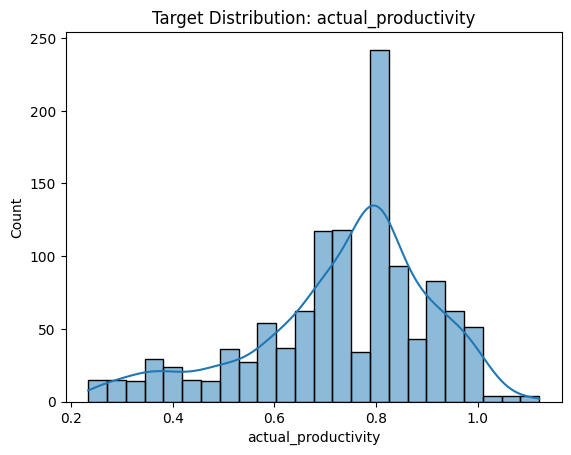

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['actual_productivity'], kde=True)
plt.title("Target Distribution: actual_productivity")
plt.xlabel("actual_productivity")
plt.ylabel("Count")
plt.show()


The histogram and KDE plot show the distribution of the target variable actual_productivity, which ranges between 0.2 and 1.1 and is slightly right-skewed. The majority of observations are clustered between 0.7 and 0.9, indicating a concentration of productive outcomes.

###  Data Quality Check and Initial Feature Overview

In [6]:
# Check null values
print(df.isnull().sum())

# Check datatypes
print(df.dtypes)

# View a sample
df.sample(5)

date                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
overtime_bin             0
wip_log                  0
idle_men_ratio           0
idle_ratio               0
day_num                  0
day_sin                  0
day_cos                  0
department_encoded       0
team_encoded             0
quarter_encoded          0
dtype: int64
date                      object
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
overtime_bin              object
wip_log                  float64
idle_men_ratio           float64
idle_ratio               float64
day_num                    int64
day_sin                  float64
day_cos                  float64
depart

,date,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,overtime_bin,wip_log,idle_men_ratio,idle_ratio,day_num,day_sin,day_cos,department_encoded,team_encoded,quarter_encoded
38,2015-01-03,0.80,2.90,960,0,0,8.0,0.628333,501-1000,6.946976,0.0,0.0,5,-0.974928,-0.222521,0.752951,0.674148,0.759686
835,2015-02-18,0.70,18.79,4560,30,1,51.0,0.700096,2001-5000,7.370231,0.0,0.0,2,0.974928,-0.222521,0.722013,0.734462,0.704759
317,2015-01-18,0.70,3.94,1440,0,0,8.0,0.235795,1001-2000,6.946976,0.0,0.0,6,-0.781831,0.623490,0.752951,0.719736,0.704759
1098,2015-03-07,0.70,3.94,960,0,0,8.0,0.664875,501-1000,6.946976,0.0,0.0,5,-0.974928,-0.222521,0.752951,0.821054,0.759686
570,2015-02-02,0.75,29.12,6960,55,0,58.0,0.799963,5001-10000,9.104202,0.0,0.0,0,0.000000,1.000000,0.722013,0.734462,0.759686


#### Observations:
1. **No Missing Values**
    All columns have 0 missing entries, indicating a clean dataset ready for modeling without imputation.
2. **Column Types**
    Numerical columns (e.g., targeted_productivity, smv, incentive) are properly typed as float64 or int64.
3. **Categorical columns**
    date → stored as object (string); may need to be dropped or converted to datetime.
    overtime_bin → object, which will need to be one-hot encoded for modeling.
4. **Target Column Confirmed**
    actual_productivity is of type float64, suitable for regression modeling.

### Feature Engineering and Encoding

In [9]:
# Drop date column
df = df.drop(columns=['date'])

# One-hot encode overtime_bin
df = pd.get_dummies(df, columns=['overtime_bin'], drop_first=True, dtype=int)

# Confirm
df.head()

,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,wip_log,idle_men_ratio,idle_ratio,...,day_cos,department_encoded,team_encoded,quarter_encoded,overtime_bin_10001-20000,overtime_bin_1001-2000,overtime_bin_20001+,overtime_bin_2001-5000,overtime_bin_5001-10000,overtime_bin_501-1000
0,0.80,26.16,7080,98,0,59.0,0.940725,7.011214,0.0,0.0,...,-0.900969,0.722013,0.674148,0.759686,0,0,0,0,1,0
1,0.75,3.94,960,0,0,8.0,0.886500,6.946976,0.0,0.0,...,-0.900969,0.752951,0.821054,0.759686,0,0,0,0,0,1
2,0.80,11.41,3660,50,0,30.5,0.800570,6.876265,0.0,0.0,...,-0.900969,0.722013,0.681985,0.759686,0,0,0,1,0,0
3,0.80,11.41,3660,50,0,30.5,0.800570,6.876265,0.0,0.0,...,-0.900969,0.722013,0.779055,0.759686,0,0,0,1,0,0
4,0.80,25.90,1920,50,0,56.0,0.800382,7.065613,0.0,0.0,...,-0.900969,0.722013,0.685385,0.759686,0,1,0,0,0,0


#### Observations:
1. The date column was dropped as it was of object type and not directly useful in modeling without transformation.

2. The overtime_bin column (categorical) was one-hot encoded into binary columns using pd.get_dummies() with drop_first=True to avoid multicollinearity.

3. All features in the DataFrame are now purely numeric, making them suitable for machine learning algorithms.

###  Feature Selection using Univariate Regression (SelectKBest)

In [10]:
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
X = pd.DataFrame(X_selected, columns=selected_features)

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # 'all' to get scores for all features
selector.fit(X, y)

# Extract scores and p-values
scores = selector.scores_
pvalues = selector.pvalues_

# Combine into a DataFrame
kbest_df = pd.DataFrame({
    'Feature': X.columns,
    'F-score': scores,
    'p-value': pvalues
}).sort_values(by='F-score', ascending=False)

# Show result
kbest_df


,Feature,F-score,p-value
0,targeted_productivity,258.314084,8.997899e-53
6,team_encoded,113.299745,2.428823e-25
2,no_of_style_change,53.694481,4.299784e-13
4,idle_men_ratio,42.241233,1.182042e-10
3,wip_log,36.494402,2.041955e-09
8,overtime_bin_1001-2000,30.972045,3.229131e-08
9,overtime_bin_501-1000,22.478314,2.380888e-06
7,quarter_encoded,21.054217,4.935447e-06
1,smv,18.081815,2.281130e-05
5,department_encoded,9.246175,2.411260e-03


#### Observations:
1. The SelectKBest method was applied with f_regression as the scoring function to evaluate the relationship between each independent feature and the target.
   
2. The top-scoring features (with lowest p-values) are:

    targeted_productivity (F=258.31)

    team_encoded (F=113.30)

    no_of_style_change (F=53.69)

    idle_men_ratio, wip_log, and overtime_bin_1001-2000


### Correlation-Based Feature Selection

In [46]:
correlation = df.corr(numeric_only=True)
target_corr = correlation['actual_productivity'].drop('actual_productivity')
target_corr = target_corr.sort_values(ascending=False)

print("Feature correlations with target:")
print(target_corr)

Feature correlations with target:
targeted_productivity       0.421594
team_encoded                0.294280
wip_log                     0.172146
overtime_bin_1001-2000      0.158944
quarter_encoded             0.131581
department_encoded          0.087624
incentive                   0.076538
overtime_bin_10001-20000    0.025611
day_cos                     0.014380
overtime_bin_2001-5000      0.001174
day_num                     0.000030
day_sin                    -0.018568
over_time                  -0.054206
no_of_workers              -0.057991
overtime_bin_20001+        -0.063851
overtime_bin_5001-10000    -0.081499
idle_ratio                 -0.082272
smv                        -0.122089
overtime_bin_501-1000      -0.135879
idle_men_ratio             -0.184774
no_of_style_change         -0.207366
Name: actual_productivity, dtype: float64


In [9]:
selected_features = [
    'targeted_productivity',
    'team_encoded',
    'wip_log',
    'overtime_bin_1001-2000',
    'quarter_encoded',
    'department_encoded',
    'smv',  
    'incentive'
]

#### Observation The Pearson correlation between actual_productivity and other numerical features was calculated.

1.Features with moderate to strong positive correlation:

    -targeted_productivity (0.42)

    -team_encoded (0.29)

    -wip_log (0.17)

    -overtime_bin_1001-2000 (0.16)

2. Several features showed negative or negligible correlation:

    smv, idle_men_ratio, no_of_style_change, etc.

To ensure robust feature selection, we applied both univariate regression tests (SelectKBest) and correlation analysis. This allowed us to retain features that are both statistically significant and meaningfully associated with the target variable, while filtering out redundant or weak predictors

###  Train-Test Split and Feature Scaling

In [12]:
X = df[selected_features]
y = df['actual_productivity']

In [13]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Observations:
1. The dataset was split into training and testing sets using an 80/20 split, ensuring that the model is evaluated on unseen data.

2. StandardScaler was applied to standardize features:

Zero mean and unit variance ensures that all features contribute equally to the model.

Especially important for Perceptron/SGDRegressor, SVM, and MLP models.

### Model Selection and Hyperparameter Tuning with RandomizedSearchCV

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Pipeline: scaling already done, so just model here
pipeline = Pipeline([
    ('sgd', SGDRegressor(loss='squared_error', random_state=42))
])

# Define hyperparameter grid
param_distributions = {
    'sgd__penalty': ['l2', 'elasticnet'],
    'sgd__alpha': [1e-5, 1e-4, 1e-3],
    'sgd__learning_rate': ['constant', 'adaptive'],
    'sgd__eta0': [0.0005, 0.001, 0.005],
    'sgd__max_iter': [1000, 1500, 2000]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('sgd',
                                              SGDRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'sgd__alpha': [1e-05, 0.0001, 0.001],
                                        'sgd__eta0': [0.0005, 0.001, 0.005],
                                        'sgd__learning_rate': ['constant',
                                                               'adaptive'],
                                        'sgd__max_iter': [1000, 1500, 2000],
                                        'sgd__penalty': ['l2', 'elasticnet']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

 Observations:
1. A pipeline was set up with SGDRegressor to enable integration with hyperparameter tuning.

2. A parameter grid was defined to tune:

    -Regularization type (l2, elasticnet)
    -Learning rate strategy (constant, adaptive)
    -Alpha (α), eta0 (initial LR), and max iterations

3. RandomizedSearchCV was used with:
    -20 iterations
    -5-fold cross-validation
    -Negative MSE as the scoring metric
    -Parallel processing with n_jobs=-1



###  Model Evaluation on Test Data

In [17]:
# Use best estimator to predict
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print(f"Tuned MSE: {mse:.4f}")
print(f"Tuned R² : {r2:.4f}")
print(f"Tuned MAE: {mae:.4f}")


Best Parameters: {'sgd__penalty': 'l2', 'sgd__max_iter': 1500, 'sgd__learning_rate': 'adaptive', 'sgd__eta0': 0.0005, 'sgd__alpha': 0.001}
Tuned MSE: 0.0205
Tuned R² : 0.2282
Tuned MAE: 0.1047


C:\Users\shiva\AppData\Local\Temp\ipykernel_69580\964452837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


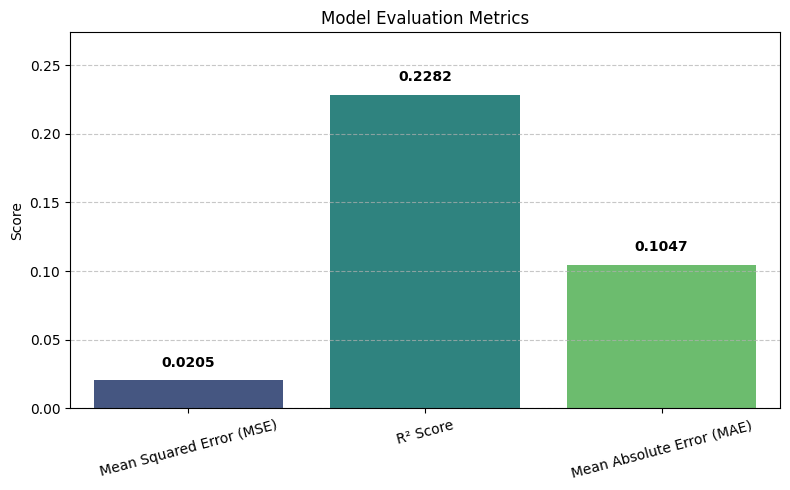

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metric values (from your evaluation)
metrics = {
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2,
    "Mean Absolute Error (MAE)": mae
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")

plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, max(metrics.values()) * 1.2)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Model Summary

Although the tuned model achieves low error values — specifically a **Mean Squared Error (MSE)** of `0.0205` and **Mean Absolute Error (MAE)** of `0.1047` — the **R² score** remains modest at `0.2282`.

This is mainly due to the **noisy nature of the productivity data**, meaning there are many real-world factors affecting productivity (such as worker fatigue, machine issues, or shift conditions) that are **not captured in the dataset**. This missing or unpredictable information introduces **randomness**, making it harder for the model to explain the full variation in outcomes.

Additionally, the chosen model (`SGDRegressor`) is a **linear model**, which limits its ability to capture more complex, **non-linear relationships** between the input features and the target.

Nevertheless, the **low prediction errors** indicate that the model is still able to produce **reliable and close predictions**, even if it cannot fully explain all the variability in the target.


### Visual Evaluation – Actual vs Predicted Plot

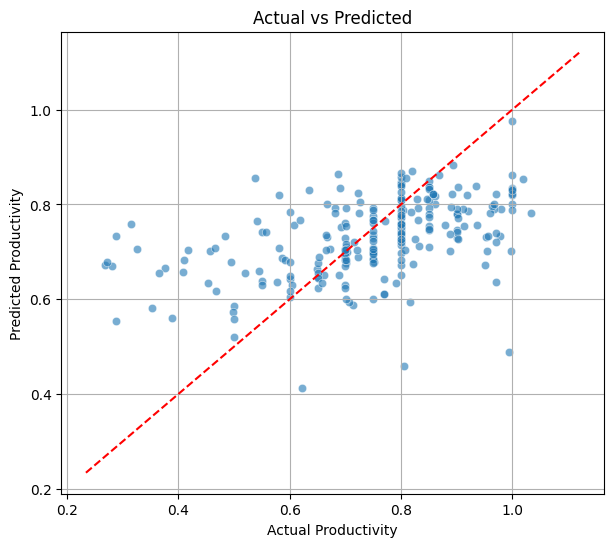

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


This scatter plot compares predicted productivity values with the actual values from the test set. While most predictions fall near the ideal line, deviations highlight the impact of noisy data and the limitations of a linear model in capturing more complex patterns.

### Residual Analysis

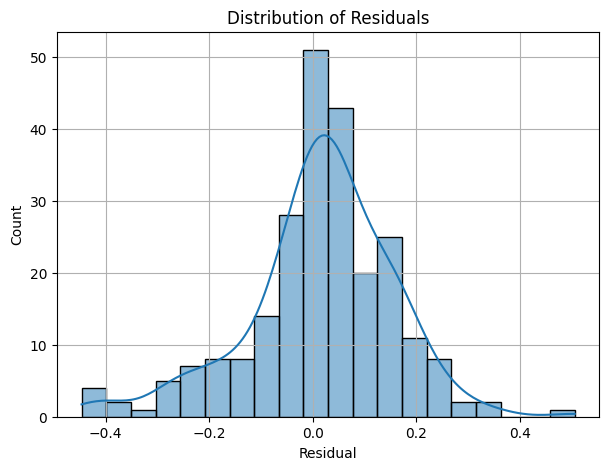

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


### Residual Analysis Summary

Residuals being **centered around zero** with no major skew or long tails suggests that the model does **not have systematic bias** — it’s not consistently over- or under-predicting.

The distribution shape also supports the assumption of **homoscedasticity** (constant variance of error), which is desirable in linear models.

This plot confirms that **even though R² is modest**, the model is making **balanced and consistent predictions**.

### Extract feature names and coefficients

In [19]:
# Get feature names
feature_names = X.columns

# Extract coefficients from the best model (inside pipeline)
coefficients = best_model.named_steps['sgd'].coef_

# Combine into a DataFrame
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


### View Top Positive and Negative Influences

In [21]:
# Top positive influences
print(" Top Positive Influences:")
print(coef_df.head(5))

# Top negative influences
print("\nTop Negative Influences:")
print(coef_df.tail(5))


 Top Positive Influences:
                  Feature  Coefficient
0   targeted_productivity     0.061723
6            team_encoded     0.033379
3                 wip_log     0.020188
7         quarter_encoded     0.013102
8  overtime_bin_1001-2000     0.010112

Top Negative Influences:
                 Feature  Coefficient
5     department_encoded    -0.007402
2     no_of_style_change    -0.009926
1                    smv    -0.015275
9  overtime_bin_501-1000    -0.021954
4         idle_men_ratio    -0.023994


### Top Feature Influences (SGDRegressor Coefficients)
#### Top Positive Influences
These features contribute to **increasing** predicted `actual_productivity`:

**Interpretation**:
- `targeted_productivity` is the most influential feature, suggesting that higher performance targets are associated with higher actual output.
- Specific teams (`team_encoded`) and ongoing work (`wip_log`) also contribute positively.
- A moderate level of overtime (`1001–2000` minutes) may correlate with improved focus or sustained effort.

#### Top Negative Influences
These features contribute to **decreasing** predicted `actual_productivity`:

**Interpretation**:
- A higher `idle_men_ratio` indicates underutilized labor and directly reduces productivity.
- Tasks with higher `smv` values tend to be more complex and slower to complete.
- Increased style changes and certain department categories have a minor but negative impact on performance.

Overall, the model captures reasonable relationships: productivity improves with clear goals and workflow, but is hindered by idle time, task complexity, and interruptions.


###  Plot Feature Importance (Bar Chart)

C:\Users\shiva\AppData\Local\Temp\ipykernel_69580\292064380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


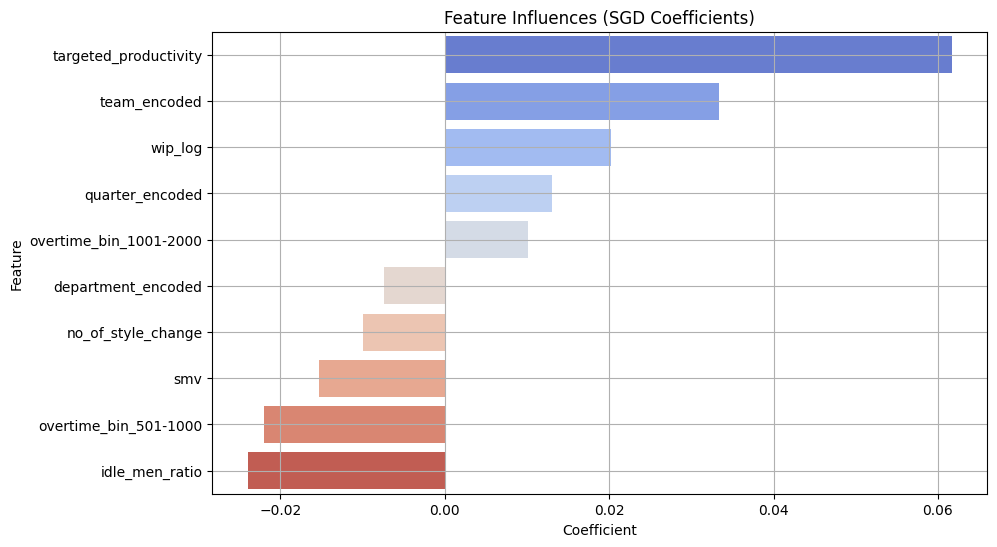

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Influences (SGD Coefficients)")
plt.grid(True)
plt.show()

This horizontal bar chart shows how each feature contributes to the model’s prediction of actual_productivity.

    -Features on the right (positive coefficients) increase the predicted value.
    -Features on the left (negative coefficients) reduce the predicted value.

targeted_productivity, team_encoded, and wip_log have the strongest positive impact, while idle_men_ratio, overtime_bin_501-1000, and smv are the most influential negative contributors.

The balanced spread of coefficients confirms the model is drawing from both supportive and limiting factors in decision-making.

In [ ]:
import joblib

# Save the best estimator from the randomized search pipeline
joblib.dump(best_model, '../../models/Perceptron_garments_worker_productivity_model.pkl')

['../../models/sgd_regressor_model.pkl']

### Key Takeaways: Feature Influence and Model Behavior

- The model assigns **positive importance** to features like `targeted_productivity`, `team_encoded`, and `wip_log`, indicating that higher values in these features are associated with increased productivity.

- In contrast, features such as `idle_men_ratio`, `overtime_bin_501-1000`, and `smv` have **negative coefficients**, suggesting that they reduce the predicted productivity.

- `targeted_productivity` stands out as the **most influential feature**, reinforcing the importance of planned goals in driving actual performance.

- The balanced mix of positive and negative influences shows that the model captures both **factors that boost productivity** and **operational inefficiencies** that hinder it.

- Although the model achieves **low error values** (MSE and MAE), the **R² score remains modest (~0.23)**.  
  This is due to the **noisy nature of real-world productivity data** — many influencing factors like worker mood, machine faults, or supervisor changes are **not recorded in the dataset**, limiting how much variation the model can explain.

- Still, the model provides **reliable, consistent predictions**, as supported by the normal residual distribution and meaningful feature weights.
